In [1]:
import metpy.io.nexrad
reload(metpy.io.nexrad)
Level3File = metpy.io.nexrad.Level3File
from metpy.plots import nws_radar_tables

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline

In [3]:
def get_table(code):
    print code
    cmap = ListedColormap(nws_radar_tables.ref_table[1:])
    cmap.set_under(nws_radar_tables.ref_table[0])
    bounds = np.arange(5, 80, 5)
    return BoundaryNorm(bounds, len(bounds) - 1), cmap

In [35]:
def print_tab_pages(prod):
    print ('\n' + '-'*80 + '\n').join(prod.tab_pages)

def print_graph_pages(prod):
    colors = {0:'white', 3:'red', 4:'cyan'}
    for page in prod.graph_pages:
        fig, ax = plt.subplots(1, 1, figsize=(10,10))
        ax.axesPatch.set_facecolor('black')
        for line in page:
            if 'color' in line:
                c = colors[line['color']]
                if 'text' in line:
                    ax.text(line['x'], line['y'], line['text'], color=c,
                            transform=ax.transData, verticalalignment='top',
                            horizontalalignment='left', fontdict={'family':'monospace'},
                            fontsize=8)
                else:
                    vecs = np.array(line['vectors'])
                    ax.plot(vecs[:, ::2], vecs[:, 1::2], color=c)
        ax.set_xlim(0, 639)
        ax.set_ylim(511, 0)
        ax.set_aspect('equal', 'box')
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.yaxis.set_major_locator(plt.NullLocator())
        for s in ax.spines: ax.spines[s].set_color('none')

def plot_prod(prod, ax=None):
    if ax is None:
        ax = plt.gca()

    data_block = prod.sym_block[0][0]
    data = np.array(data_block['data'])
    data = prod.map_data(data)
    data = np.ma.array(data, mask=np.isnan(data))
    if 'start_az' in data_block:
        az = np.array(data_block['start_az'] + [data_block['end_az'][-1]])
        rng = np.linspace(0, prod.max_range, data.shape[-1] + 1)
        x = rng * np.sin(np.deg2rad(az[:, None]))
        y = rng * np.cos(np.deg2rad(az[:, None]))
    else:
        x = np.linspace(-prod.max_range, prod.max_range, data.shape[1] + 1)
        y = np.linspace(-prod.max_range, prod.max_range, data.shape[0] + 1)
        data = data[::-1]
    norm,cmap = get_table(prod.header.code)
    pc = ax.pcolormesh(x, y, data, cmap=cmap, norm=norm)
    plt.colorbar(pc, extend='both')
    ax.set_aspect('equal', 'datalim')
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    return pc, data

def plot_points(prod, ax=None):
    if ax is None:
        ax = plt.gca()

    data_block = prod.sym_block[0]
    styles = {'MDA': dict(marker='o', markerfacecolor='None', markeredgewidth=2, size='radius'),
              'MDA (Elev.)': dict(marker='s', markerfacecolor='None', markeredgewidth=2, size='radius'),
              'TVS': dict(marker='v', markerfacecolor='red', markersize=10),
              'Storm ID': dict(text='id'),
              'HDA': dict(marker='o', markersize=10, markerfacecolor='blue', alpha=0.5)}
    artists = []
    for point in data_block:
        if 'type' in point:
            info = styles.get(point['type'], {}).copy()
            x,y = point['x'], point['y']
            text_key = info.pop('text', None)
            if text_key:
                artists.append(ax.text(x, y, point[text_key], transform=ax.transData, clip_box=ax.bbox, **info))
                artists[-1].set_clip_on(True)
            else:
                size_key = info.pop('size', None)
                if size_key:
                    info['markersize'] = np.pi * point[size_key]**2
                artists.append(ax.plot(x, y, **info))

def plot_tracks(prod, ax=None):
    if ax is None:
        ax = plt.gca()
        
    data_block = prod.sym_block[0]

    for track in data_block:
        if 'marker' in track:
            pass
        if 'track' in track:
            x,y = np.array(track['track']).T
            ax.plot(x, y, color='k')

In [14]:
tvs = Level3File('temp/KBMX_SDUS64_NTVBMX_201104272341')
nmd = Level3File('temp/KBMX_SDUS34_NMDBMX_201104272341')
nhi = Level3File('temp/KBMX_SDUS64_NHIBMX_201104272341')
n0q = Level3File('temp/KBMX_SDUS54_N0QBMX_201104272341')

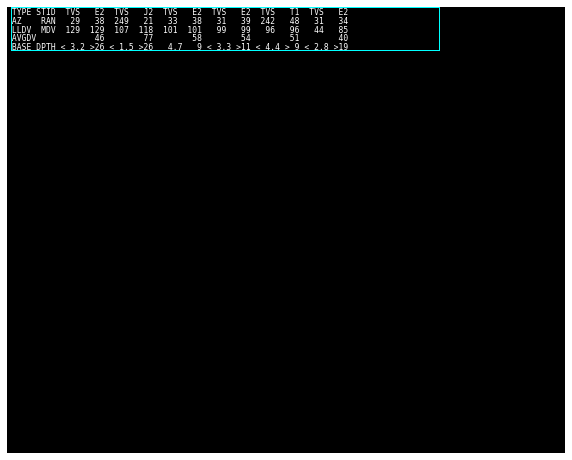

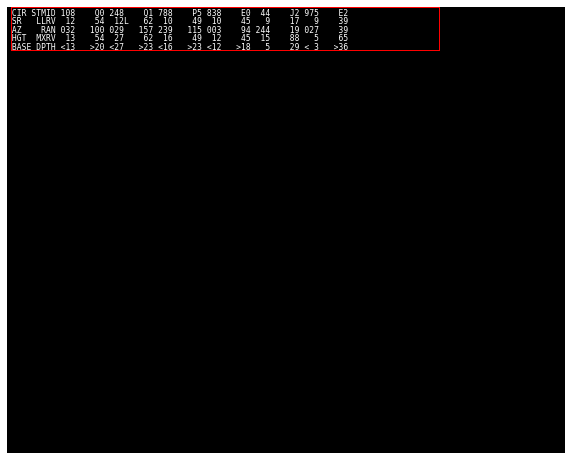

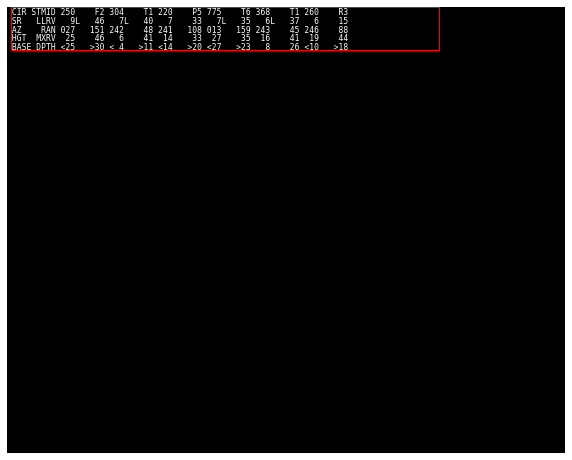

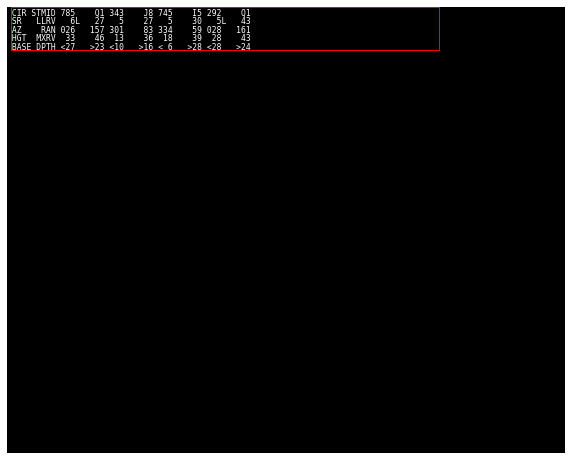

In [6]:
print_graph_pages(tvs)
print_graph_pages(nmd)

In [16]:
print_tab_pages(tvs)
print_tab_pages(nmd)
print_tab_pages(nhi)

                                                                                
                            Tornado Vortex Signature                            
      Radar Id 320   Date/Time  04:27:11/23:41:29   Number of TVS/ETVS    6/  0 
                                                                                
 Feat  Storm   AZ/RAN  AVGDV  LLDV  MXDV/Hgt   Depth    Base/Top   MXSHR/Hgt    
 Type    ID   (deg,nm)  (kt)  (kt)  (kt,kft)   (kft)     (kft)     (E-3/s,kft)  
                                                                                
  TVS    E2    29/ 38    46   129   129/ 3.2   >25.6  < 3.2/ 28.8    53/ 3.2    
  TVS    J2   249/ 21    77   107   118/ 2.2   >26.4  < 1.5/>27.9   130/27.9    
  TVS    E2    33/ 38    58   101   101/ 4.7     9.2    4.7/ 13.9    43/ 4.7    
  TVS    E2    31/ 39    54    99    99/ 3.3   >11.2  < 3.3/ 14.5    41/ 3.3    
  TVS    T1   242/ 48    51    96    96/ 4.4   > 9.2  < 4.4/ 13.6    32/ 4.4    
  TVS    E2    31/ 34    40 

94


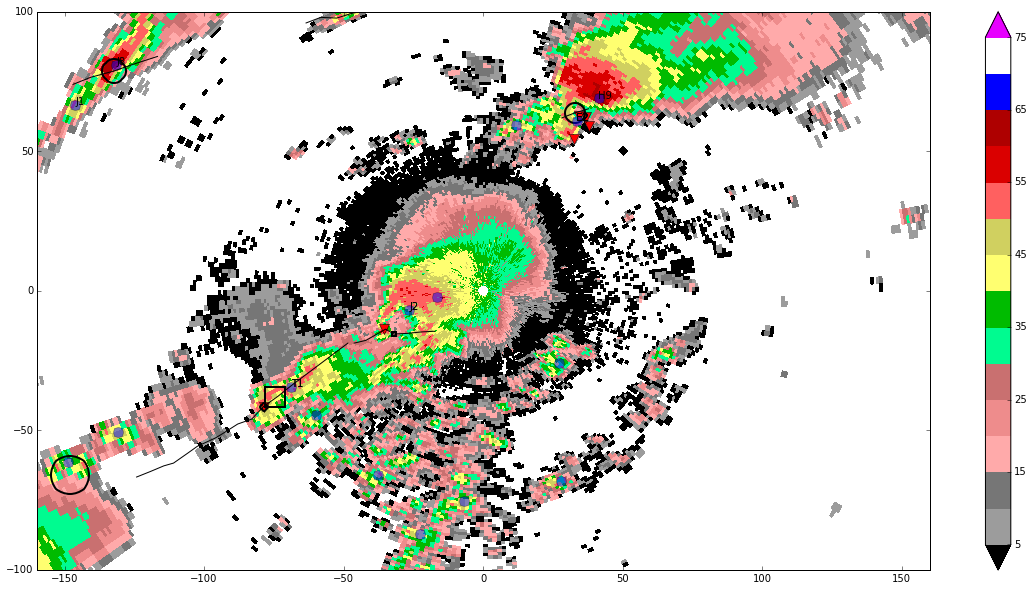

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
pc, data = plot_prod(n0q, ax)
plot_points(tvs)
plot_points(nmd)
plot_points(nhi)
plot_tracks(nmd)

19
27
99
94
20
30
28
32


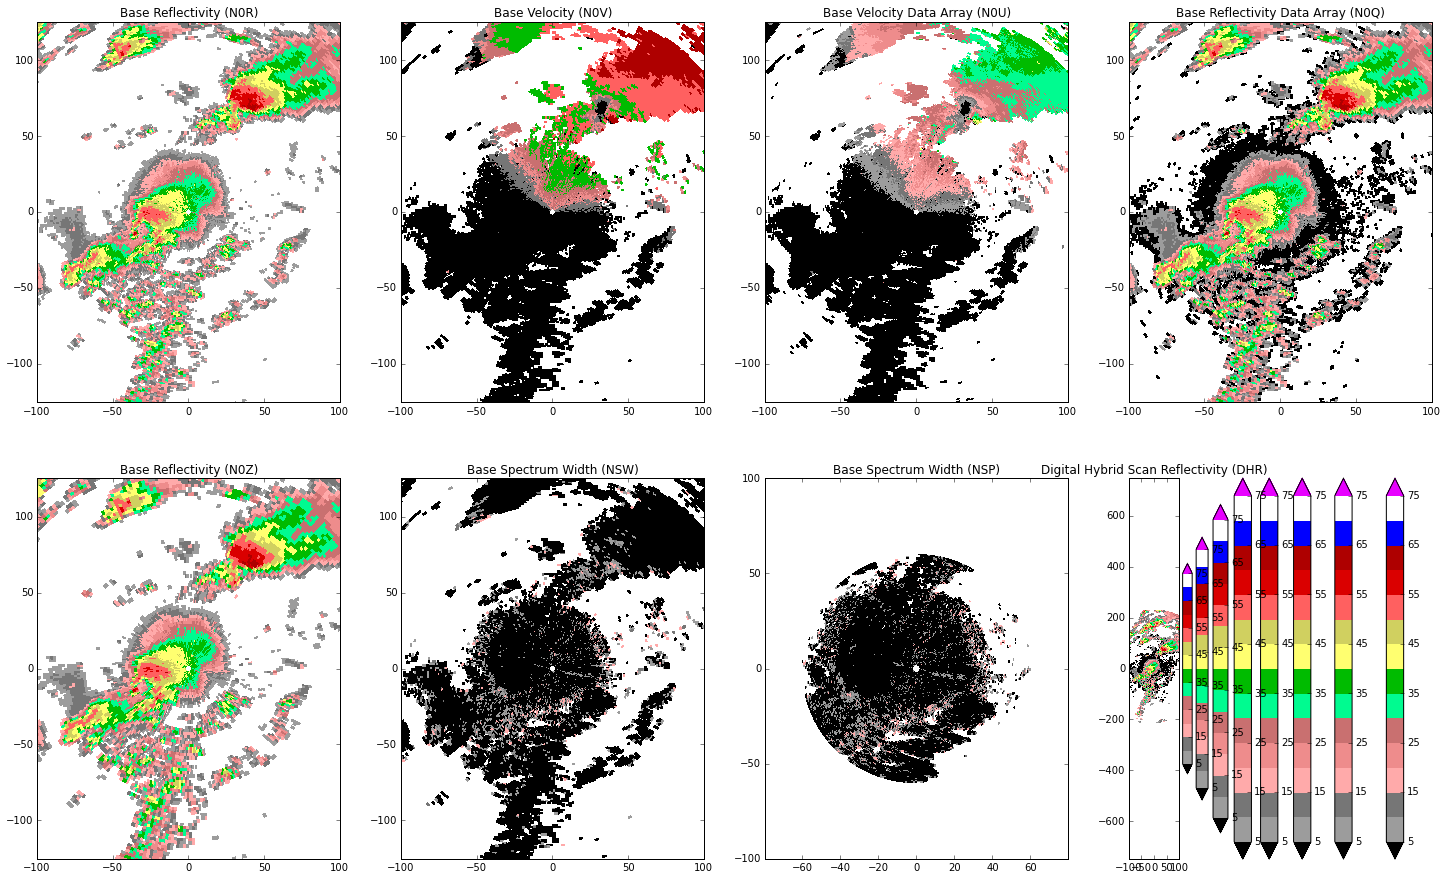

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15), dpi=100)
prods = [(5, 'N0R'), (5, 'N0V'), (5, 'N0U'), (5, 'N0Q'), (7, 'N0Z'), (6, 'NSW'), (6, 'NSP'), (5, 'DHR')]
for (code, prodID), ax in zip(prods, axes.flat):
    p = Level3File('temp/KBMX_SDUS%d4_%sBMX_201104272341' % (code, prodID))
    plot_prod(p, ax)
    ax.set_title('%s (%s)' % (p.product_name, prodID))

134
57


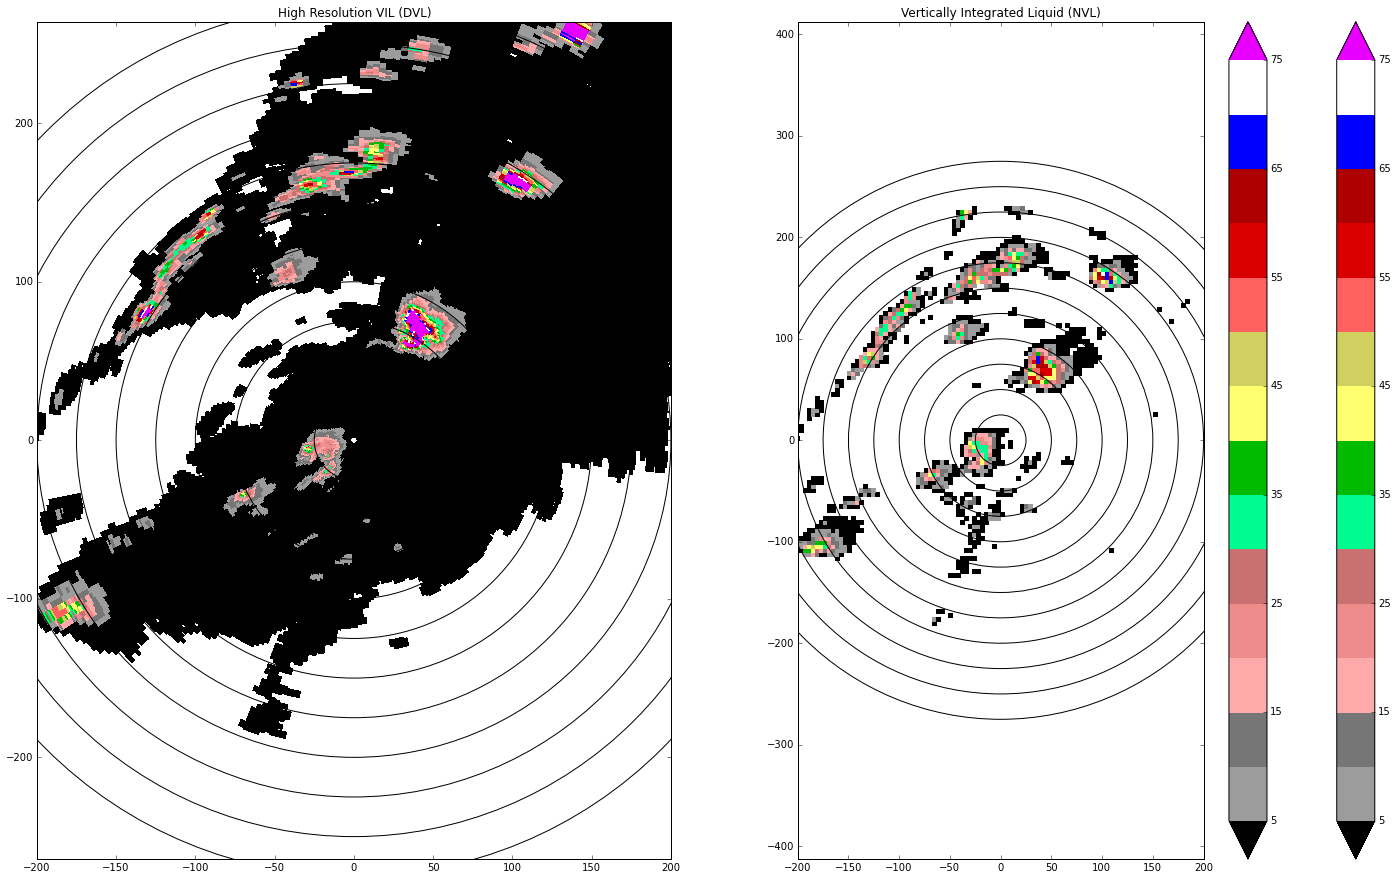

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(25, 15), dpi=100)
prods = [(5, 'DVL'), (5, 'NVL')]
for (code, prodID), ax in zip(prods, axes.flat):
    p = Level3File('temp/KBMX_SDUS%d4_%sBMX_201104272341' % (code, prodID))
    plot_prod(p, ax)
    ax.set_title('%s (%s)' % (p.product_name, prodID))
    ax.set_xlim(-200, 200)
    ax.set_ylim(-200, 200)
    for rad in range(25, 300, 25):
        ax.add_patch(plt.Circle((0, 0), radius=rad, transform=ax.transData, fill=False))

In [11]:
import glob
for fname in glob.iglob('temp/*201104272341'):
    print('{0.filename}: {0.product_name}'.format(Level3File(fname)))

temp/KBMX_SDUS24_N1QBMX_201104272341: Base Reflectivity Data Array
temp/KBMX_SDUS24_N1SBMX_201104272341: Storm Relative Mean Radial Velocity
temp/KBMX_SDUS24_N1UBMX_201104272341: Base Velocity Data Array
temp/KBMX_SDUS24_N2QBMX_201104272341: Base Reflectivity Data Array
temp/KBMX_SDUS24_N2SBMX_201104272341: Storm Relative Mean Radial Velocity
temp/KBMX_SDUS24_N2UBMX_201104272341: Base Velocity Data Array
temp/KBMX_SDUS24_N3QBMX_201104272341: Base Reflectivity Data Array
temp/KBMX_SDUS24_N3UBMX_201104272341: Base Velocity Data Array
temp/KBMX_SDUS34_N1PBMX_201104272341: Surface Rainfall Accumulation (1 hour)
temp/KBMX_SDUS34_N3SBMX_201104272341: Storm Relative Mean Radial Velocity
temp/KBMX_SDUS34_NMDBMX_201104272341: Mesocyclone Detection
temp/KBMX_SDUS34_NSTBMX_201104272341: Storm Tracking Information
temp/KBMX_SDUS54_DHRBMX_201104272341: Digital Hybrid Scan Reflectivity
temp/KBMX_SDUS54_DPABMX_201104272341: Hourly Digital Precipitation Array
temp/KBMX_SDUS54_DSPBMX_201104272341: Digi

In [13]:
nhi.sym_block[0]

[defaultdict(<type 'list'>, {'POSH': -999, 'Max Size': 0, 'POH': -999, 'y': 281.75, 'x': 212.5, 'type': 'HDA'}),
 defaultdict(<type 'list'>, {'POSH': 100, 'Max Size': 2, 'POH': 100, 'y': 162.5, 'x': 104.0, 'type': 'HDA'}),
 defaultdict(<type 'list'>, {'y': 162.5, 'x': 104.0, 'type': 'Storm ID', 'id': 'Q0'}),
 defaultdict(<type 'list'>, {'POSH': 100, 'Max Size': 3, 'POH': 100, 'y': 69.0, 'x': 41.5, 'type': 'HDA'}),
 defaultdict(<type 'list'>, {'y': 69.0, 'x': 41.5, 'type': 'Storm ID', 'id': 'H9'}),
 defaultdict(<type 'list'>, {'POSH': -999, 'Max Size': 0, 'POH': -999, 'y': 256.25, 'x': 141.75, 'type': 'HDA'}),
 defaultdict(<type 'list'>, {'POSH': 80, 'Max Size': 2, 'POH': 100, 'y': 160.75, 'x': -27.0, 'type': 'HDA'}),
 defaultdict(<type 'list'>, {'y': 160.75, 'x': -27.0, 'type': 'Storm ID', 'id': 'Z0'}),
 defaultdict(<type 'list'>, {'POSH': 90, 'Max Size': 2, 'POH': 100, 'y': 81.0, 'x': -131.5, 'type': 'HDA'}),
 defaultdict(<type 'list'>, {'y': 81.0, 'x': -131.5, 'type': 'Storm ID', 'id

In [41]:
len([pack for pack in nhi.sym_block[0] if 'type' in pack and pack['type'] == 'HDA'])

36